In [17]:
import cv2
import matplotlib.pyplot as plt

from ultralytics import YOLO

<h3 style="color:orange">Hyperparmeter</h3>

In [18]:
weight_dir="./weights/license_plate_detector_YOLO.pt"

model=YOLO('yolov8n.yaml')
model=YOLO('./weights/license_plate_detector_YOLO.pt')

image_url=["../dataset/images/test1.jpg","../code/output/images/out_car-wbs-CH01AN0001_00000.png"]

print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

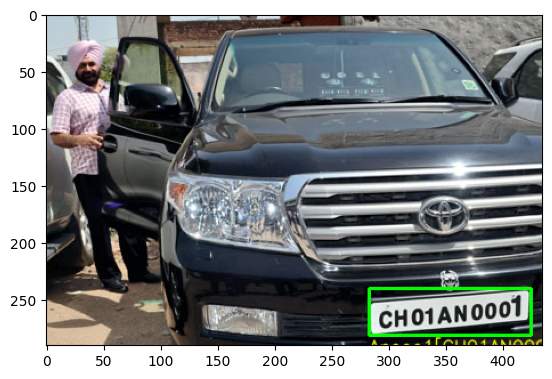

In [19]:
img=cv2.imread(image_url[1])
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img,cmap="gray")

In [ ]:
pred=model(img)
# print(pred)

pred=pred[0]
# print(len(pred))
# print(pred)
# print(pred.boxes)
# print(pred.boxes.data)
print(pred.boxes.data.tolist())


0: 448x640 3 License_Plates, 523.4ms
Speed: 5.0ms preprocess, 523.4ms inference, 5.0ms postprocess per image at shape (1, 3, 448, 640)
3
[[278.24798583984375, 233.5144805908203, 423.6940612792969, 284.6764831542969, 0.7447424530982971, 0.0], [134.86000061035156, 247.90216064453125, 204.70022583007812, 280.9732971191406, 0.6452738046646118, 0.0], [0.5313001275062561, 157.52883911132812, 8.936676025390625, 197.67247009277344, 0.255626916885376, 0.0]]


In [ ]:
detection=[]
for x in pred.boxes.data.tolist():
    x1,y1,x2,y2,score,classes=x
    detection.append([x1,y1,x2,y2,score])

# print(len(detection))


3
